In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from cyclicityanalysis import OrientedArea, COOM
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import scipy as sc

In [2]:
def plot_heatmap(df, ax = None, figsize = (5,5),
                 title='Lead Lag Matrix', title_size=10,
                 xlabel=None, ylabel=None, xlabel_size=10, ylabel_size=10,
                 xticks = True, yticks = True,
                 linecolor='black', linewidths=1.0,
                 annot=False, square=True, cmap='bwr', cbar=True,
                 cbar_title='Oriented Area', cbar_title_size = 10,
                 cbar_location='right', cbar_orientation = None):

  if ax is None:
    ax=plt.subplots(figsize=figsize)[-1]

  sns.heatmap(df, ax=ax, cmap=cmap,linewidths=linewidths, xticklabels=xticks, yticklabels=yticks,
              linecolor=linecolor, square=square, cbar=cbar, annot=annot,
              cbar_kws={'location': cbar_location, 'orientation' : cbar_orientation})

  cbar_ax = ax.figure.axes[-1]
  ax.set_title(title, size=title_size)
  ax.set_xlabel(xlabel, size=xlabel_size)
  ax.set_ylabel(ylabel, size=ylabel_size)
  cbar_ax.set_title(cbar_title, size=cbar_title_size)
  return ax

def constellation_plot(v, sequential_order_dict, ax=None, figsize=(5,5),
                       title='Leading Eigenvector Components Plot', title_size=10,
                       xlabel = 'Re(z)', xlabel_size = 10, ylabel = 'Im(z)', ylabel_size=10,
                       plot_xmin = None , plot_xmax = None, plot_ymin = None, plot_ymax = None, xaxis_color='black', yaxis_color= 'black',
                       marker_size = 10, marker_color='blue', annotate_constellations = True, marker_annotation_size=15,
                       include_sequential_order_arrows = False , arrowstyle='simple',
                       arrow_mutation_scale = 10, arrow_linewidth=0.05, arrow_color='black'):


  if ax is None:
    ax=plt.subplots(figsize=figsize)[-1]

  sequential_order_indices = list(sequential_order_dict.keys())
  sequential_order_columns = list(sequential_order_dict.values())

  x,y = np.real(v) , np.imag(v)
  N=len(v)

  if plot_xmax is None:
    plot_xmax= np.max(np.abs(x)) + 0.05
  if plot_xmin is None:
    plot_xmin = -plot_xmax
  if plot_ymax is None:
    plot_ymax= np.max(np.abs(y)) + 0.05
  if plot_ymin is None:
    plot_ymin = -plot_ymax

  ax.set_title(title, size=title_size)
  ax.scatter(x,y,color=marker_color,s=marker_size)
  ax.set_xlim(plot_xmin , plot_xmax)
  ax.set_ylim(plot_ymin , plot_ymax)
  ax.hlines(0 , plot_xmin , plot_xmax, color=xaxis_color)
  ax.vlines(0 , plot_ymin , plot_ymax, color=yaxis_color)
  ax.set_xlabel(xlabel, size=xlabel_size)
  ax.set_ylabel(ylabel, size=ylabel_size)

  if annotate_constellations:
    for n in range(N):
      text = sequential_order_indices[n]+1
      coords = (x[sequential_order_indices[n]],y[sequential_order_indices[n]])
      ax.annotate(text=text, xy=coords, size=marker_annotation_size)
  if include_sequential_order_arrows:
    for n in range(N-1):
      head = (x[sequential_order_indices[n+1]],y[sequential_order_indices[n+1]])
      tail = (x[sequential_order_indices[n]],y[sequential_order_indices[n]])
      arrow = patches.FancyArrowPatch(tail, head, mutation_scale=arrow_mutation_scale,
                                      arrowstyle=arrowstyle,
                                      lw=arrow_linewidth,color=arrow_color)
      ax.add_patch(arrow)
  return ax

def eigenvalue_moduli_plot(eigenvalue_moduli, ax=None , figsize=(5,5) ,
                           title='Eigenvalue Moduli Plot' , title_size=10,
                           xlabel='Eigenvalue Index', xlabel_size=10,
                           ylabel = 'Modulus', ylabel_size=10, linewidth=1.0,
                           marker_size=15):
  if ax is None:
    ax = plt.subplots(figsize=figsize)[-1]

  ax.set_title(title, size=title_size)
  ax.set_xlabel(xlabel, size=xlabel_size)
  ax.set_ylabel(ylabel, size=ylabel_size)

  ax.scatter(range(len(eigenvalue_moduli)) , eigenvalue_moduli, s = marker_size , color='red')
  ax.plot(eigenvalue_moduli, linewidth=linewidth, color='red')
  return ax

# Sample Leader Follower Signals

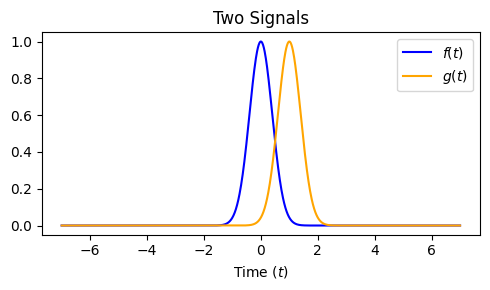

In [3]:
t=np.linspace(-7,7,1000)
df=pd.DataFrame()
fig,ax=plt.subplots(1,1,figsize=(5,3))
df[r'$f(t)$']=np.exp(-np.pi*t**2)
df[r'$g(t)$']=np.exp(-np.pi*(t-1)**2)
df.index.rename("t",inplace=True)
df.index=t
df[df.columns[0]].plot(ax=ax,color='blue')
df[df.columns[1]].plot(ax=ax,color='orange')
ax.set_xlabel("Time ($t$)")
ax.set_title("Two Signals")
ax.legend()
fig.tight_layout()
PDF = PdfPages("Chapter1/SampleLeaderFollowerSignalsExample.pdf")
PDF.savefig(fig)
PDF.close()

# Sample Cross Correlation of Signals



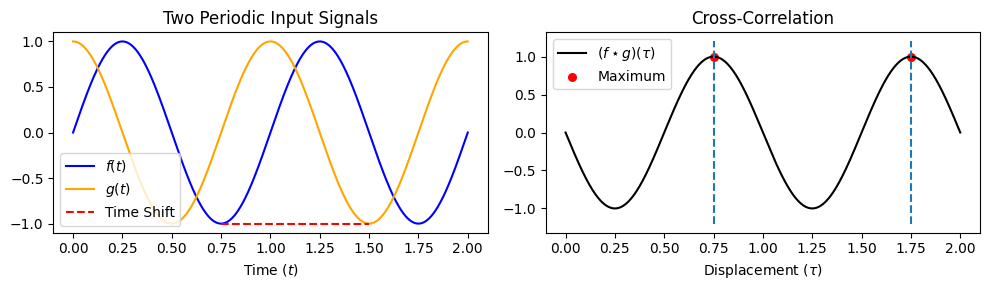

In [4]:
import scipy as sc

t=np.linspace(0,2,100000)
df=pd.DataFrame()
fig,axs=plt.subplots(1,2,figsize=(10,3))
df[r'$f(t)$']=np.sin(2*np.pi*t)
df[r'$g(t)$']=np.cos(2*np.pi*t)
df.index.rename("t",inplace=True)
df.index=t
corr=-np.sin(2*np.pi*t)/2
df[r'$(f \star g)(\tau)$']=corr/corr.max()
df[df.columns[0]].plot(ax=axs[0],color='blue')
df[df.columns[1]].plot(ax=axs[0],color='orange')
df[df.columns[2]].plot(ax=axs[1],color='black')

axs[1].scatter([0.75],[1],s=30,color='red',label= 'Maximum')
axs[1].vlines(0.75,-1.2,1.2,linestyle='dashed')

axs[1].scatter([1.75],[1],s=30,color='red')
axs[1].vlines(1.75,-1.2,1.2,linestyle='dashed')

#df[df.columns[2]].plot(ax=axs[1],color='black')
axs[0].set_xlabel(r"Time ($t$)")
axs[0].set_title("Two Periodic Input Signals")
axs[0].hlines(-1,0.75,1.50,linestyle='dashed', color='red',label='Time Shift')
axs[1].set_xlabel(r"Displacement ($\tau$)")
axs[1].set_title("Cross-Correlation")
axs[0].legend(loc='lower left')
axs[1].legend(loc='upper left')
fig.tight_layout()
PDF = PdfPages("Chapter1/SampleCrossCorrelation.pdf")
PDF.savefig(fig)
PDF.close()

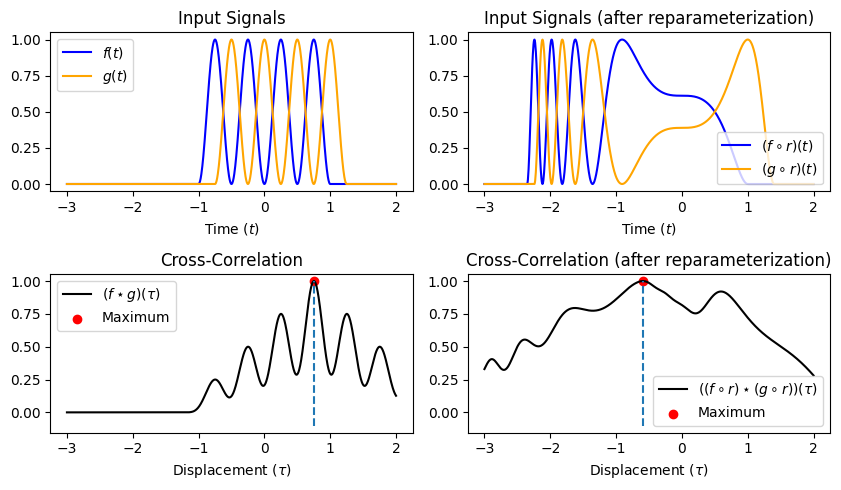

In [5]:
def func(x):
    if abs(x)<=1:
        return np.sin(2*np.pi*x)**2
    else:
        return 0
t=np.linspace(-3,2,1000)


df=pd.DataFrame(index=t)
df.index.rename("Time ($t$)",inplace=True)
df[r'$f(t)$']=np.array([func(x) for x in t])
df[r'$g(t)$']=np.array([func(x-0.25) for x in t])
df[r'$(f \star g)(\tau)$'] = sc.signal.convolve(df[df.columns[0]],
                                                df[df.columns[1]],mode='same')
df[r'$(f \star g)(\tau)$']/=df[r'$(f \star g)(\tau)$'].max()

dfprime=pd.DataFrame(index=t)
dfprime.index.rename("Time ($t$)",inplace=True)
dfprime[r'$(f \circ r)(t)$']=np.array([func(x**3/7+6/7) for x in t])
dfprime[r'$(g \circ r)(t)$']=np.array([func(x**3/7+6/7-0.25) for x in t])
dfprime[r'$((f \circ r) \star (g \circ r))(\tau)$'] = sc.signal.convolve(dfprime[dfprime.columns[0]],
                                                                         dfprime[dfprime.columns[1]],mode='same')
dfprime[r'$((f \circ r) \star (g \circ r))(\tau)$']/=dfprime[r'$((f \circ r) \star (g \circ r))(\tau)$'].max()

fig,axs=plt.subplots(2,2,figsize=(8.5,5))
df[[df.columns[0]]].plot(color='blue',ax=axs[0,0])
df[[df.columns[1]]].plot(color='orange',ax=axs[0,0])
df[[df.columns[2]]].plot(ax=axs[1,0],color='black')

dfprime[dfprime.columns[0]].plot(color='blue',ax=axs[0,1])
dfprime[dfprime.columns[1]].plot(color='orange',ax=axs[0,1])
dfprime[[dfprime.columns[2]]].plot(ax=axs[1,1],color='black')

for ax in axs[1]:
    ax.set_xlabel(r'Displacement ($\tau$)')

axs[0,0].set_title("Input Signals")
axs[0,1].set_title("Input Signals (after reparameterization)")

axs[1,0].set_title("Cross-Correlation")
axs[1,1].set_title("Cross-Correlation (after reparameterization)")

axs[1,0].scatter(df[r'$(f \star g)(\tau)$'].idxmax(),df[r'$(f \star g)(\tau)$'].max() ,color='red',label='Maximum')
axs[1,1].scatter(dfprime[r'$((f \circ r) \star (g \circ r))(\tau)$'].idxmax(),
                 dfprime[r'$((f \circ r) \star (g \circ r))(\tau)$'].max() ,color='red',label='Maximum')

axs[1,0].vlines(df[r'$(f \star g)(\tau)$'].idxmax(),-0.1,1,linestyle='dashed')
axs[1,1].vlines(dfprime[r'$((f \circ r) \star (g \circ r))(\tau)$'].idxmax(),-0.1,1,linestyle='dashed')

axs[1,0].legend()
axs[0,1].legend(loc='lower right')
axs[1,1].legend(loc='lower right')
fig.tight_layout()
PDF = PdfPages("Chapter1/SampleReparameterizationVariance.pdf")
PDF.savefig(fig)
PDF.close()

# Chain of Offsets Model

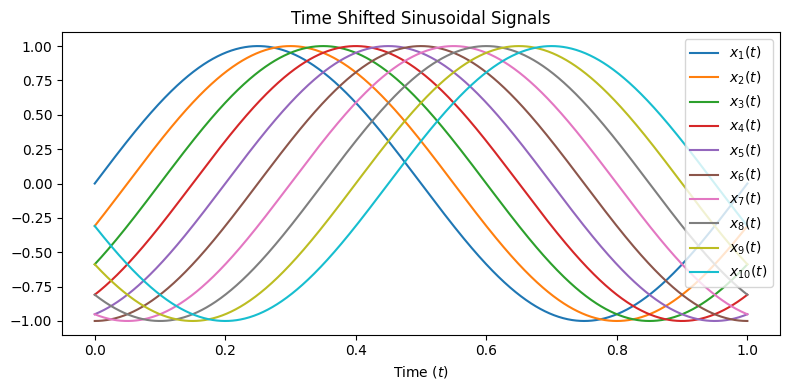

In [6]:
t=np.linspace(0,1,1000)
df=pd.DataFrame()
fig,ax=plt.subplots(figsize=(8,4))
for n in range(10):
    df[r'$x_{{{}}}(t)$'.format(n+1)]=np.sin(2*np.pi*(t-n/20))
df.index.rename("t",inplace=True)
df.index=t
df.plot(ax=ax)
ax.set_title("Time Shifted Sinusoidal Signals")
ax.legend(loc='upper right')
ax.set_xlabel("Time ($t$)")
fig.tight_layout()
PDF = PdfPages("Chapter1/SamplePeriodicCOOMExample.pdf")
PDF.savefig(fig)
PDF.close()

<Axes: title={'center': 'Lead Matrix'}>

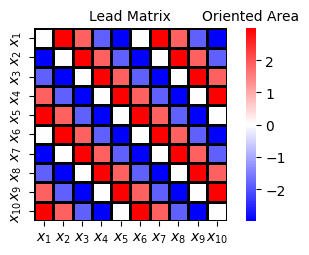

In [7]:
t=np.linspace(0,1,1000)
df=pd.DataFrame()
fig,ax=plt.subplots(1,1,figsize=(5,2.5))
for n in range(10):
    df[r'$x_{{{}}}$'.format(n+1)]=np.sin(2*np.pi*(t-n/5))
df.index.rename("t",inplace=True)
df.index=t
Q=OrientedArea(df).compute_lead_lag_df()
plot_heatmap(Q,ax=ax,cmap='bwr',square=True,title='Lead Matrix')

# coom=COOM(Q)
# v=coom.get_leading_eigenvector(0)
# sequential_order_dict=coom.compute_sequential_order_dict(v)
# 
# constellation_plot(v,sequential_order_dict,ax=axs[-1],annotate_constellations=False)

# fig.tight_layout()

# Cyclic yet Aperiodic Signals

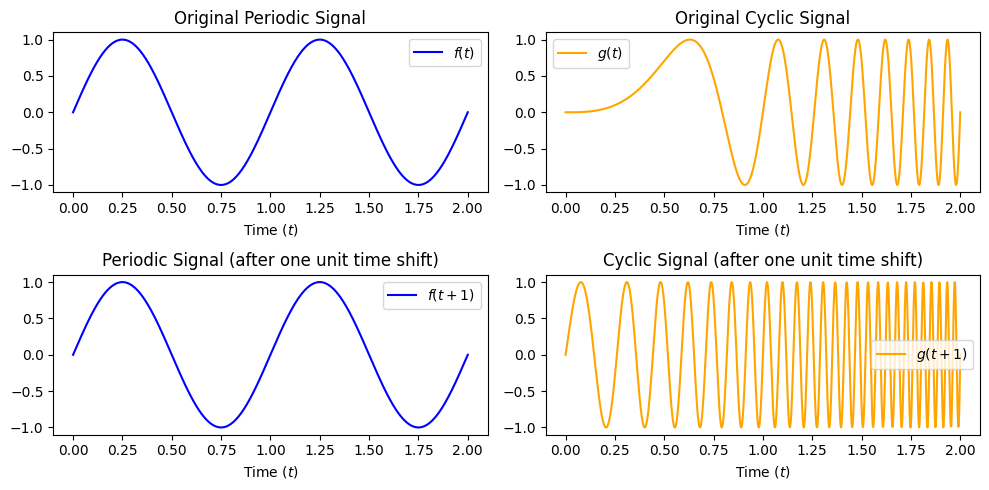

In [8]:
t=np.linspace(0,2,1000)
df1=pd.DataFrame(index=t)
df2=pd.DataFrame(index=t)

fig,axs=plt.subplots(2,2,figsize=(10,5))
df1[r'$f(t)$'] = np.sin(2*np.pi*t)
df1[r'$g(t)$'] = np.sin(2*np.pi*t**3)
df1.index.rename("t",inplace=True)

df2[r'$f(t+1)$'] = np.sin(2*np.pi*(t+1))
df2[r'$g(t+1)$'] = np.sin(2*np.pi*(t+1)**3)
df2.index.rename("t",inplace=True)

df1[df1.columns[0]].plot(ax=axs[0,0],color='blue')
df1[df1.columns[1]].plot(ax=axs[0,1],color='orange')
df2[df2.columns[0]].plot(ax=axs[1,0],color='blue')
df2[df2.columns[1]].plot(ax=axs[1,1],color='orange')

for i in range(axs.shape[0]):
    for j in range(axs.shape[1]):
        ax=axs[i,j]
        ax.set_xlabel("Time ($t$)")
        ax.legend()
axs[0,0].set_title("Original Periodic Signal")
axs[1,0].set_title("Periodic Signal (after one unit time shift)")
axs[0,1].set_title("Original Cyclic Signal")
axs[1,1].set_title("Cyclic Signal (after one unit time shift)")
fig.tight_layout()
PDF = PdfPages("Chapter1/SampleCyclicSignals.pdf")
PDF.savefig(fig)
PDF.close()

# Oriented Area

In [54]:
from matplotlib.markers import MarkerStyle

t=np.linspace(-7,7,100)
df=pd.DataFrame()
fig,axs=plt.subplots(1,2,figsize=(10,3))
axs=axs.reshape(1,2)

df[r'$f(t)$']=np.exp(-np.pi*t**2)
df[r'$g(t)$']=np.exp(-np.pi*(t-1)**2)
df.index.rename("t",inplace=True)
df.index=t
df[[df.columns[0]]].plot(ax=axs[0,0],color='blue')
df[[df.columns[1]]].plot(ax=axs[0,0],color='orange')

axs[0,1].plot(df[df.columns[0]].values,df[df.columns[1]].values,linewidth=3.0)
axs[0,1].set_xlim(-1.2,1.2)
axs[0,1].set_ylim(-1.2,1.2)


axs[0,0].set_xlabel("Time ($t$)")
axs[0,0].legend()


for ax in axs[0:,1]:
    ax.hlines(0,-2,2,color='black')
    ax.vlines(0,-2,2,color='black')
    ax.set_xlabel(r'$f(t)$')
    ax.set_ylabel(r'$g(t)$')

x,y = df[df.columns[0]], df[df.columns[1]]
x0 = x.iloc[range(len(x)-1)].values
x1 = x.iloc[range(1,len(x))].values
y0 = y.iloc[range(len(y)-1)].values
y1 = y.iloc[range(1,len(y))].values
xpos = (x0+x1)/2
ypos = (y0+y1)/2
xdir = x1-x0
ydir = y1-y0
i=0
for ax in axs[0:,1]:
    i=0
    for X,Y,dX,dY in zip(xpos, ypos, xdir, ydir):
        if i%5 ==0 and 40<i<95:
            print(i)
            ax.annotate("", xytext=(X,Y),xy=(X+0.1*dX,Y+0.1*dY), 
                    arrowprops=dict(arrowstyle="->", color='black'), size = 35)
        i+=1
axs[0,0].set_title("Input Signals")
axs[0,1].set_title("Joint Parametric Plot")
fig.tight_layout()
PDF = PdfPages("Chapter1/SampleOrientedArea.pdf")
PDF.savefig(fig)
PDF.close()

45
50
55
60
65
70
75
80
85
90


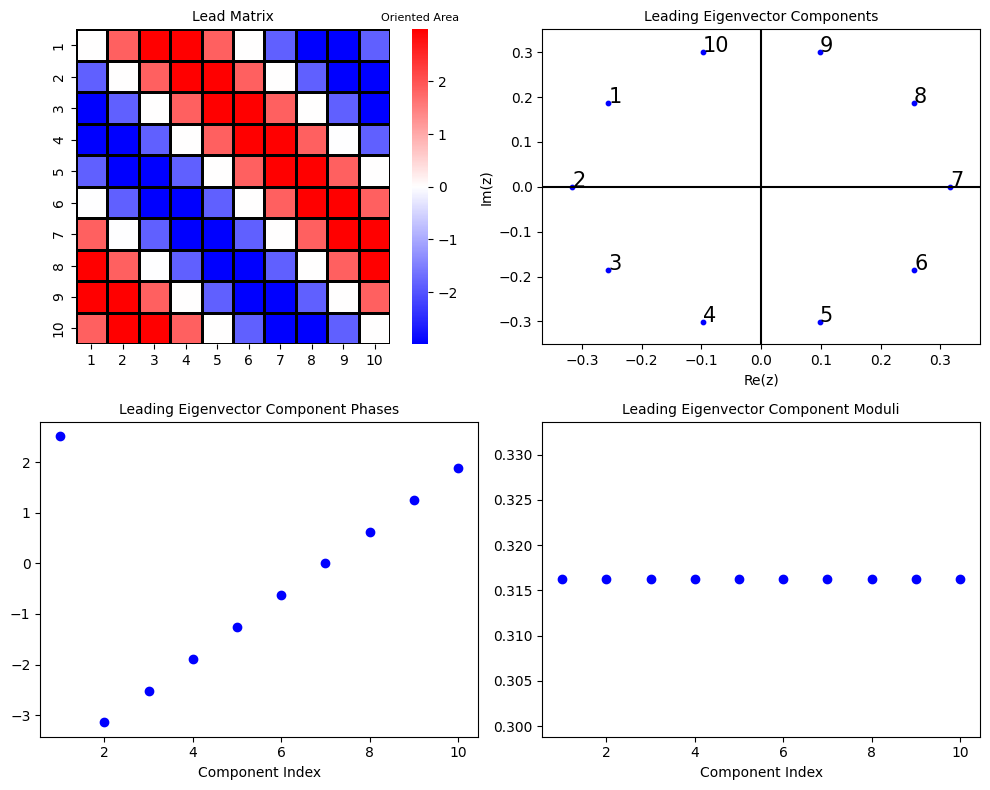

In [88]:
from cyclicityanalysis.orientedarea import *
from cyclicityanalysis.coom import *

t=np.linspace(0,1,1000)
df=pd.DataFrame(index=t)
df.index.rename(r'Time ($t$)')
fig,axs=plt.subplots(2,2,figsize=(10,8))

title_size=10
N = 10
for n in range(10):
    df['{}'.format(n+1)]=np.sin(2*np.pi*(t-n/N))
# df.plot(ax=axs[0,0])
# axs[0,0].set_xlabel(r"Time ($t$)")
lead_lag_df = OrientedArea(df).compute_lead_lag_df()

plot_heatmap(lead_lag_df,ax=axs[0,0], title='Lead Matrix', title_size=title_size,cbar_title_size=8)
coom = COOM(lead_lag_df)
v,phases,sequential_order_dict = coom.compute_sequential_order(1)

constellation_plot(v,sequential_order_dict,ax=axs[0,1], title="Leading Eigenvector Components",title_size=title_size)
axs[1,0].scatter(1+np.arange(N), np.angle(v),color='blue')
axs[1,0].set_title("Leading Eigenvector Component Phases",size=title_size)
axs[1,0].set_xlabel(r"Component Index")

axs[1,1].scatter(1+np.arange(N), np.abs(v),color='blue')
axs[1,1].set_title("Leading Eigenvector Component Moduli",size=title_size)
axs[1,1].set_xlabel(r"Component Index")
fig.tight_layout()



fig.tight_layout()
PDF = PdfPages("Chapter1/SampleLeadMatrixCOOM.pdf")
PDF.savefig(fig)
PDF.close()

In [20]:
!pip install cyclicityanalysis